In [16]:
# https://tel.archives-ouvertes.fr/tel-00818032/document

In [17]:
'''Load libs'''
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import hilbert


# from src.utils import *

plt.style.use('bmh')
np.random.seed(42)

# Generate data

In [18]:
# Generate true signal
n_time = 1000
fs = 1
t = np.linspace(0, n_time, n_time)
signal = np.sin(t * 0.04)

# Generate noise signal
noise = np.random.uniform(-0.5,0.5,n_time)
signal_add_noise = signal + noise
signal_mul_noise = signal * noise

/tmp/ipykernel_128775/476330968.py:13: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


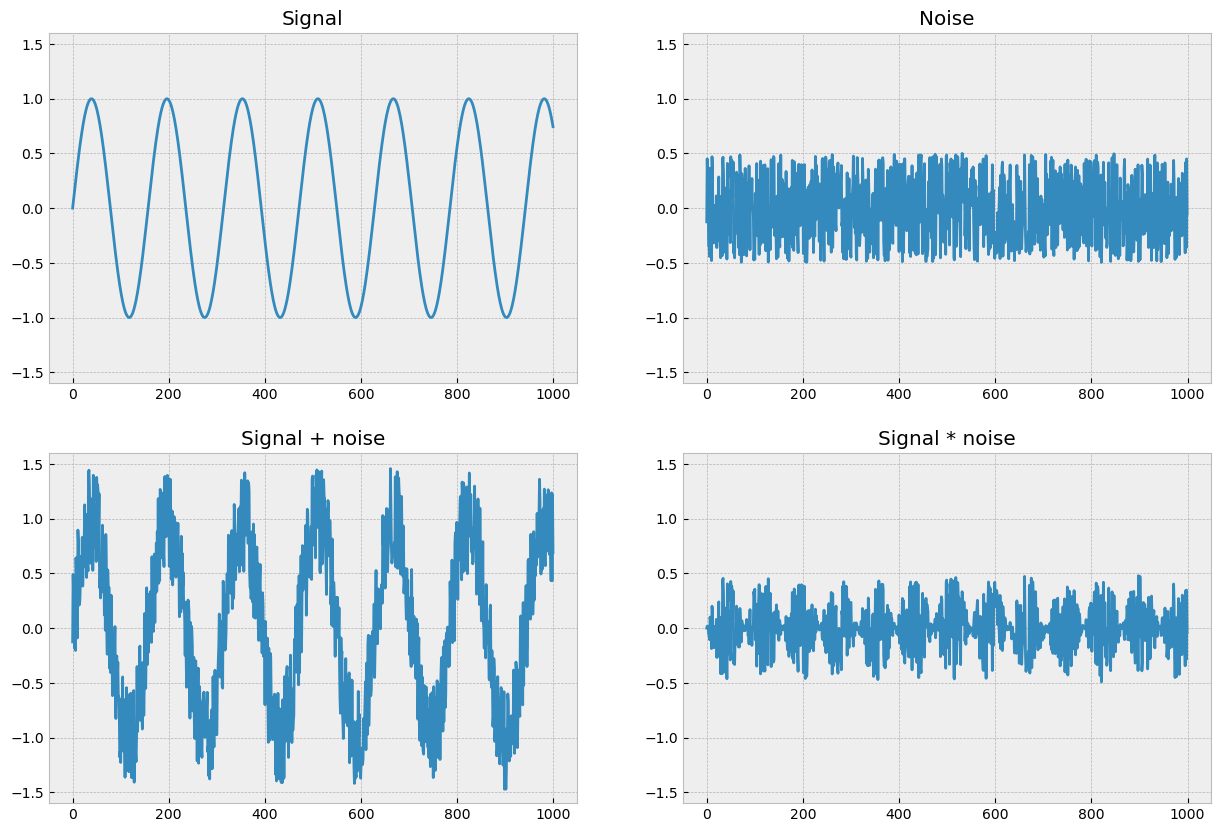

In [19]:
titles = [['Signal', 'Noise'], ['Signal + noise', 'Signal * noise']]
fig, ax = plt.subplots(2,2, figsize=(15,10))

ax[0,0].plot(signal)
ax[0,1].plot(noise)
ax[1,0].plot(signal_add_noise)
ax[1,1].plot(signal_mul_noise)

for i in range(2):
    for j in range(2):
        ax[i,j].set_ylim(-1.6,1.6)
        ax[i,j].set_title(titles[i][j])
fig.show()

# Empirical Mode Decomposition  
The EMD method is a necessary step to reduce any given data into a collection of intrinsic mode functions (IMF) to which the Hilbert spectral analysis can be applied.

1. Identify all the local extrema in the test data.
2. Connect all the local maxima by a cubic spline line as the upper envelope.
3. Repeat the procedure for the local minima to produce the lower envelope.

**max_imf** - number of Intrinsic mode functions (IMF)  
**min_std** - std of final function. Stoping condition

In [20]:
def plot_imfs(imfs, w=20, h=10):
    fig, ax = plt.subplots(len(imfs), 1, figsize=(w,h))
    for i in range(len(imfs)):
        ax[i].plot(imfs[i])
    fig.tight_layout()

In [21]:
# First IMFs
from EMD import EMD, plot_imfs
imfs_add = EMD(signal_add_noise, 1000)

imfs_mult = EMD(signal_mul_noise, 1000)

# plot_imfs(imfs)

In [22]:
# In this algorithm you dont need to calculate IMFs of the IMFs
# Second IMFs
# sec_imfs = []
# for imf in imfs:
#     sec_imfs += [EMD(imf, 3)]

# plot_imfs(sec_imfs[0])

In [23]:
# Inst freq for first IMF
def get_plot_data(imfs):
    IF = []
    HTS = []
    OMEGA = []
    for i in range(len(imfs)):
        signal_in = imfs[i]

        inst_freq = []
        hts = []
        for imf in imfs:
            ht = hilbert(signal_in)
            omega = np.unwrap(np.angle(ht))
            
            inst_freq += [np.diff(omega)]
            hts += [ht]
        IF += [inst_freq[0]]
        HTS += [hts[0]]
        OMEGA += [omega]
    return IF, HTS, OMEGA
IF_add, _, OMEGA_add = get_plot_data(imfs_add)
IF_mult, _, OMEGA_mult = get_plot_data(imfs_mult)
# inst_freq[0].shape, hts[0].shape, omega.shape

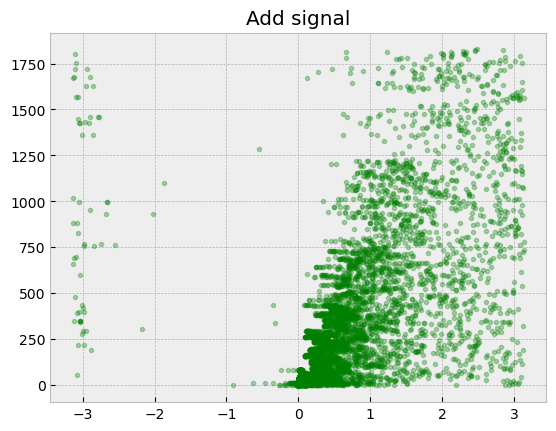

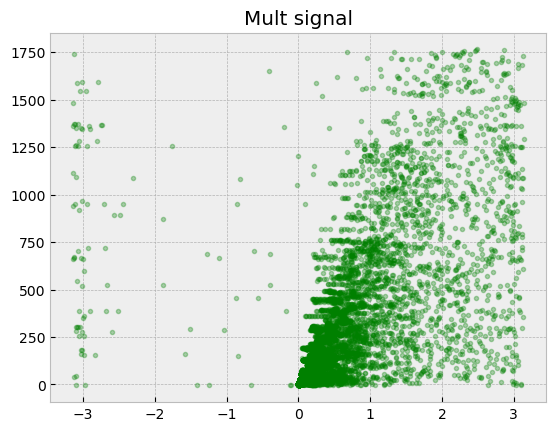

In [26]:
import matplotlib.pyplot as plt

def plot_me(imfs, IF, OMEGA, title=''):
    X = []
    Y = []
    for j in range(len(IF)):
        for i in range(len(imfs)-1):
            X += [IF[j][i]]
            Y += [OMEGA[j][i]]
    plt.figure()
    plt.plot(X, Y, '.g', alpha=0.3)
    plt.title(title)

plot_me(imfs_add, IF_add, OMEGA_add, 'Add signal')
plot_me(imfs_mult, IF_mult, OMEGA_mult, 'Mult signal')

## Old Stuff down, don't use

In [ ]:
# 

# def plot_me(imfs, IF, OMEGA, title=''):
#     for j in range(len(IF)):
#         for i in range(len(imfs)-1):
#             plt.plot(IF[j][i], OMEGA[j][i], '.r', alpha=0.3)
#     plt.title(title)

# plot_me(imfs_add, IF_add, OMEGA_add, 'Add signal')



Text(0.5, 0, 'IMF')

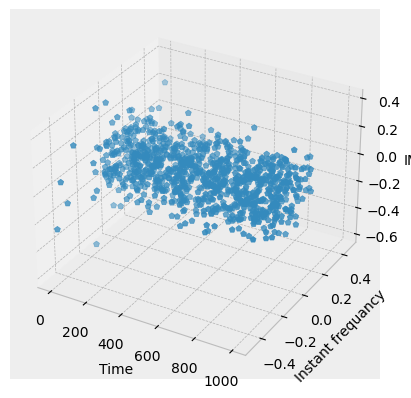

In [28]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

i = 1

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(np.arange(0,n_time),
           hts[i].real,
           hts[i].imag,
           marker='p')

ax.set_xlabel('Time')
ax.set_ylabel('Instant frequancy')
ax.set_zlabel('IMF')

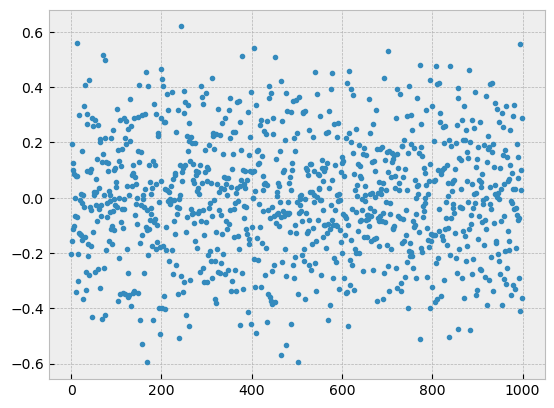

In [29]:
plt.plot(hts[0].imag, '.')
plt.show()

In [31]:
# x = np.linspace(-1,1,100)

# for i in range(len(x)-1):
#     print(x[i],x[i+1])

# h.real

In [32]:
# h = np.array(([h.real for h in hts], [h.imag for h in hts]))

# h.shape


In [33]:
# # plt.contour(X, Y, Z, colors='black');

# Hts = np.array(([h.real for h in hts], [h.imag for h in hts])).sum(2)

# plt.figure(figsize=(20,10))
# plt.contour(np.arange(3), np.arange(2), Hts)

In [34]:
# idx = 2
# plt.plot(inst_freq[idx], imfs[idx][:-1], '.')
# plt.xlabel('Instant freq')
# plt.ylabel('IMF')
# plt.show()

In [32]:
# %matplotlib widget

In [35]:
# import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D

# i = 0

# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')

# ax.scatter(np.arange(0,len(imfs[i])-1),
#            inst_freq[i],
#            imfs[i][:-1],
#            marker='p')

# ax.set_xlabel('Time')
# ax.set_ylabel('Instant frequancy')
# ax.set_zlabel('IMF')

In [36]:
# plt.plot(imfs[1], )
# plt.show()

In [88]:
x = imfs[0]

In [89]:
from scipy import fftpack
# sampling in sec
f_s = 1

X = fftpack.fft(x)
freqs = fftpack.fftfreq(len(x)) * f_s

Text(0, 0.5, 'Frequency Domain (Spectrum) Magnitude')

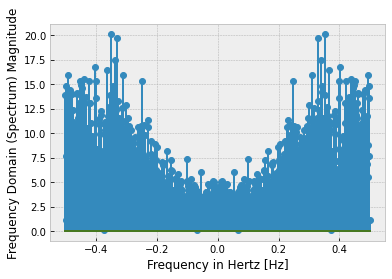

In [90]:
fig, ax = plt.subplots()

ax.stem(freqs, np.abs(X))
ax.set_xlabel('Frequency in Hertz [Hz]')
ax.set_ylabel('Frequency Domain (Spectrum) Magnitude')
# ax.set_xlim(-f_s / 2, f_s / 2)
# ax.set_ylim(-5, 110)

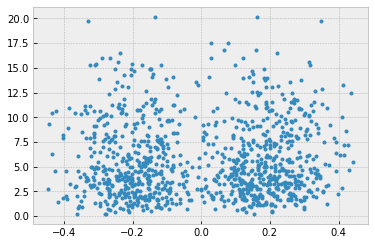

In [96]:
plt.plot(x, np.abs(X), '.')

100%|██████████| 3/3 [00:01<00:00,  2.23it/s]


ValueError: The number of FixedLocator locations (1), usually from a call to set_ticks, does not match the number of ticklabels (3).

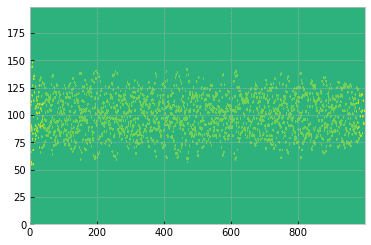

In [13]:
def get_inst_freq(signal, n_imf=3):
    inst_freq = []
    imfs = get_imfs(signal, n_imf)
    for imf in imfs:
        h = hilbert(imf)
        omega = np.unwrap(np.angle(h))
        inst_freq += [np.diff(omega)]
    return imfs, inst_freq
    
    
T = 1.0
N = 1000
n_imf = 3

spn_fft = np.fft.fft(signal_add_noise)
smn_fft = np.fft.fft(signal_mul_noise)

# xf = np.linspace(0.0, 1.0/(2.0*T), N//2)
# plt.plot(xf, 2.0/N * np.abs(spn_fft[:N//2]))
# plt.plot(xf, 2.0/N * np.abs(smn_fft[:N//2]))

t = np.arange(0,len(signal))

san_imfs, san_inst_freq = get_inst_freq(
    signal_add_noise, n_imf)
smn_imfs, smn_inst_freq = get_inst_freq(
    signal_mul_noise, n_imf)


# I need 2d array
# ????
def get_z(imfs, inst_freq, n_imf):
    z = []
    for i in t:
        z.append([])
        for j in range(200):
            z[-1].append(0)

    for n in range(n_imf):
        for i in t:
            a = int(round(imfs[n][i] * 100))
            if a > 0 and a < 100:
                z[i][a+100] = inst_freq[n][i]
            elif a < 0 and a > -100:
                z[i][100 + a] = inst_freq[n][i]
    return z

z = get_z(san_imfs, inst_freq, n_imf)

z = np.array(z).T
im = plt.contourf(z)

cbar = fig.colorbar(im, ticks=[-1, 0, 1])
cbar.ax.set_yticklabels(['< -1', '0', '> 1'])

plt.colorbar()
plt.show()

In [ ]:
san_inst_freq[0].shape

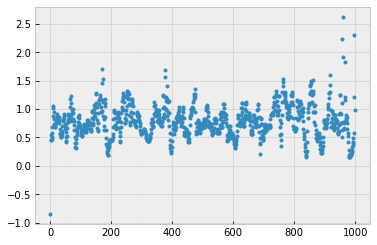

In [23]:
plt.plot(t[:-1], san_inst_freq[2], '.')


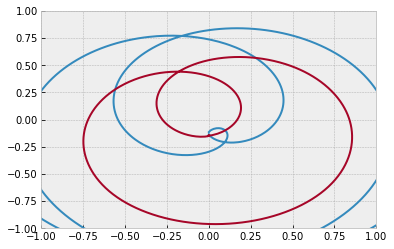

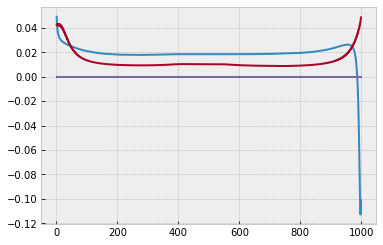

In [24]:
# In[Hilbert spectral analisys]
# Compute Hilbert transform
h0 = hilbert(imfs[0])
plt.plot(np.real(h0), np.imag(h0))


h1 = hilbert(imfs[1])
plt.plot(np.real(h1), np.imag(h1))


h2 = hilbert(imfs[2])
plt.plot(np.real(h2), np.imag(h2))

plt.xlim(-1,1)
plt.ylim(-1,1)


# instantaneous phase, instantaneous frequency
omega_0 = np.unwrap(np.angle(h0))
f_inst_0 = np.diff(omega_0)

omega_1 = np.unwrap(np.angle(h1))
f_inst_1 = np.diff(omega_1)

omega_2 = np.unwrap(np.angle(h2))
f_inst_2 = np.diff(omega_2)

plt.figure()
plt.plot(t[1:], f_inst_0)
plt.plot(t[1:], f_inst_1)
plt.plot(t[1:], f_inst_2)
